#ARTIFICIAL NEURAL NETWORKS

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Alphabets_data.csv to Alphabets_data.csv


In [ ]:
df = pd.read_csv('Alphabets_data.csv')

In [ ]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the dataset
df = pd.read_csv('Alphabets_data.csv')

# Separate features and labels
X = df.drop(columns=['letter'])
y = df['letter']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels as one-hot vectors
y_encoded = pd.get_dummies(y).values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2052 - loss: 2.9336 - val_accuracy: 0.4941 - val_loss: 1.7911
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5536 - loss: 1.6127 - val_accuracy: 0.6441 - val_loss: 1.3692
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6465 - loss: 1.2836 - val_accuracy: 0.6781 - val_loss: 1.2205
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6848 - loss: 1.1654 - val_accuracy: 0.6750 - val_loss: 1.1686
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7061 - loss: 1.0856 - val_accuracy: 0.7244 - val_loss: 1.0495
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7313 - loss: 1.0047 - val_accuracy: 0.7331 - val_loss: 0.9952
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7468 - loss: 0.9312 - val_accuracy: 0.7353 - val_loss: 0.9720
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7538 - loss: 0.9042 - val_accuracy: 0.

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

# Define a HyperModel
class ANNHyperModel(kt.HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(layers.Dense(
            hp.Int('units_1', min_value=64, max_value=256, step=64),
            activation='relu',
            input_shape=(X_train.shape[1],)
        ))
        model.add(layers.Dense(
            hp.Int('units_2', min_value=32, max_value=128, step=32),
            activation='relu'
        ))
        model.add(layers.Dense(y_encoded.shape[1], activation='softmax'))

        model.compile(
            optimizer=Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
            ),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

# Initialize the tuner
tuner = kt.RandomSearch(
    ANNHyperModel(),
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='ann_hyperparam_tuning'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=20, validation_split=0.2)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best number of units in the first hidden layer: {best_hps.get('units_1')}")
print(f"Best number of units in the second hidden layer: {best_hps.get('units_2')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")


Trial 10 Complete [00h 00m 32s]
val_accuracy: 0.8100000023841858

Best val_accuracy So Far: 0.9156249761581421
Total elapsed time: 00h 05m 24s
Best number of units in the first hidden layer: 64
Best number of units in the second hidden layer: 128
Best learning rate: 0.004227775862643285


Test loss: 0.5582
Test accuracy: 0.8480


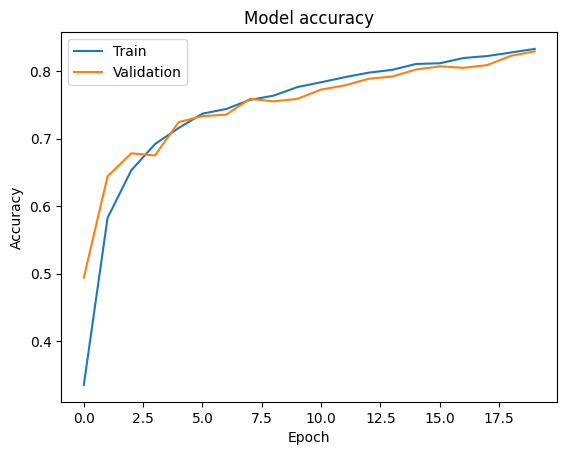

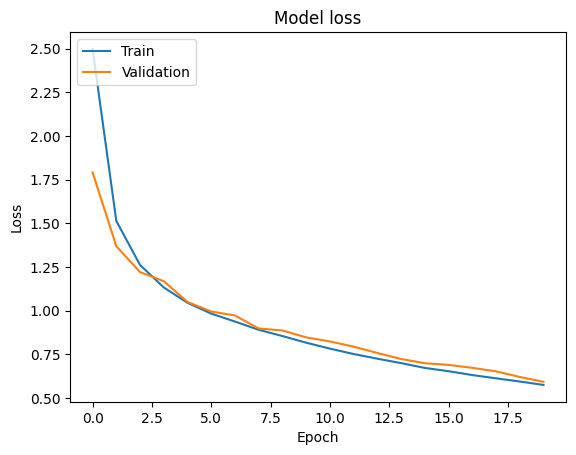

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Optional: Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()